# ISLR- Python Ch4 Applied 11

- [Load Auto Dataset](#Load-Auto-Dataset)
- [A. Create a Binary MPG Response Variable](#A.-Create-a-Binary-MPG-Response-Variable)
- [B. Explore Data Graphically](#B.-Explore-Data-Graphically) 

In [15]:
## perform imports and set-up
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from scipy import stats

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

## Load Auto Dataset

In [41]:
df = pd.read_csv('../../../data/Auto.csv',na_values='?')
len(df)

397

## A. Create a Binary MPG Response Variable

We will create a binary MPG response called MPG01 as follows, we will calculate the median of the MPG variable. For instances of MPG < median(MPG) MPG01=0 and for values of MPG > median(MPG) MPG01=1.

In [42]:
print('The median mpg is', df.mpg.median())

df['MPG01'] = df.mpg > df.mpg.median()
df.head()

The median mpg is 23.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,MPG01
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,False
1,15,8,350,165,3693,11.5,70,1,buick skylark 320,False
2,18,8,318,150,3436,11.0,70,1,plymouth satellite,False
3,16,8,304,150,3433,12.0,70,1,amc rebel sst,False
4,17,8,302,140,3449,10.5,70,1,ford torino,False


## B. Explore Data Graphically

We will explore the relationship of the predictors to MPG01. We will do this in two stages. First, we will look at scatterplots of all the predictors since the number of predictors is relatively low. Then we can zoom in on the relationship between specific predictors and the response using boxplots which are useful to plot responses over different categories.

### Scatterplots

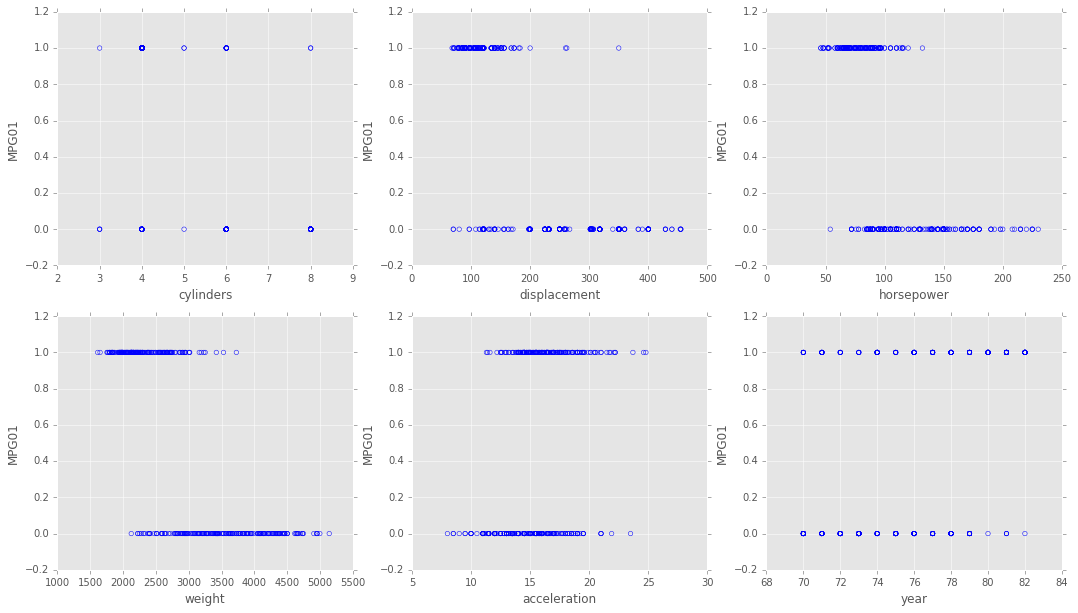

In [58]:
# make a scatter matrix, we will not use the mpg, or origin columns
predictors = df.columns[1:7]
fig, axarr = plt.subplots(2,3,figsize=(18,10))

indices = np.unravel_index(np.arange(0,6),(2,3)) # ([0 0 0 1 1 1],[0,1,2,0,1,2])
indices = list(zip(indices[0],indices[1]))

for _, (index, predictor) in enumerate(zip(indices, predictors)):
    axarr[index].scatter(df[predictor].values, df['MPG01'].values, facecolors='none', edgecolors='b')
    axarr[index].set_xlabel(predictor)
    axarr[index].set_ylabel('MPG01')


### Boxplots